https://medium.com/@jroessl/lstm-with-keras-4c4db55dd349

In [235]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



In [236]:
x = np.arange(0,100,0.5) 
y = np.sin(x)

In [237]:
og_df = pd.read_csv('data/Structured/all_data.csv')

C:\Users\albin\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3442: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [238]:

df = og_df.dropna(axis=1, how='all')
df.drop(['Summa gas/Diesel'], axis=1, inplace=True)

df = df.fillna(method='ffill')
df = df.fillna(method='bfill')
for e in df.columns:
    if df[e].nunique() == 1:
        df = df.drop(e, axis=1)
  
first_column = df.pop('SE1')
df.insert(1, 'SE1', first_column)
df.drop(['Date'], axis=1, inplace=True)
df = df.iloc[:,0:2]
data = df.to_numpy()
n_features = data.shape[1]
print(data[0:10])

c:\Users\albin\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\albin\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3382: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if await self.run_code(code, result, async_=asy):


[[133.95  26.68]
 [133.95  26.68]
 [133.95  26.68]
 [133.95  26.68]
 [133.95  26.68]
 [133.95  26.68]
 [133.95  26.68]
 [133.95  26.68]
 [133.95  26.68]
 [133.95  26.68]]


In [239]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = scaler.fit(data)
# print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
# # normalize the dataset and print
# normalized = scaler.transform(data)
# print(normalized)
# # inverse transform and print
# inversed = scaler.inverse_transform(normalized)
# print(inversed)

In [240]:
look_back = 10
def create_dataset(data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        dataX.append(data[i:(i+look_back)])
        dataY.append(data[i + look_back][0])
    return np.array(dataX), np.array(dataY)

x_train, y_train = create_dataset(data, look_back)
print(x_train[0:10])
print(y_train[0:10])

[[[133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]]

 [[133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]]

 [[133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]]

 [[133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]]

 [[133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]]

 [[133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]
  [133.95  26.68]


In [241]:
print(x_train.shape)
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# print(x_train.shape)

(202867, 10, 2)


In [242]:

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True, input_shape=(look_back, n_features)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Normalization(),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')


In [243]:
model.fit(x_train, y_train, epochs=200, verbose=1)

Epoch 1/200
6340/6340 [==============================] - 94s 13ms/step - loss: 128835.3828
Epoch 2/200
6340/6340 [==============================] - 84s 13ms/step - loss: 71909.3516
Epoch 3/200
6340/6340 [==============================] - 104s 16ms/step - loss: 52050.0039
Epoch 4/200
6340/6340 [==============================] - 84s 13ms/step - loss: 44542.6992
Epoch 5/200
6340/6340 [==============================] - 84s 13ms/step - loss: 40563.2383
Epoch 6/200
6340/6340 [==============================] - 84s 13ms/step - loss: 37853.4883
Epoch 7/200
 618/6340 [=>............................] - ETA: 1:23 - loss: 33368.8203

KeyboardInterrupt: 

In [ ]:
x_test = np.arange(0,100,0.5) 
y_test = np.sin(x_test)
x_test, y_train = create_dataset(y_test, 10)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
predicted  = model.predict(x_test)

6/6 [==============================] - 1s 5ms/step


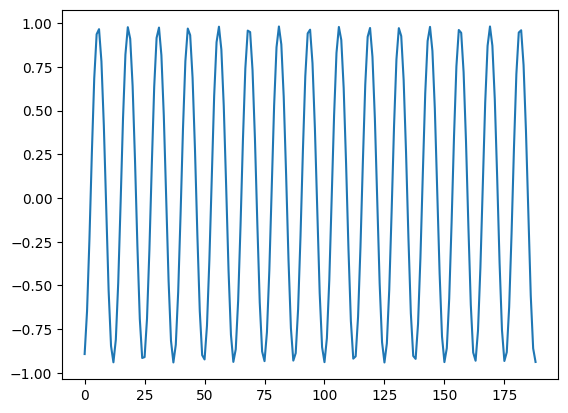

In [ ]:
plt.plot(predicted)